# Scanorama experiment

In [7]:
import anndata as ad
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import scanorama

In [8]:
# source 3_utils.py
from utils import comp_kde, kdeplot2, get_kde_eval, norm

## Load data

In [9]:
d1 = ad.read_h5ad("data/dynchro1_slingshot_processed.h5ad")
d2 = ad.read_h5ad("data/dynchro2_slingshot_processed.h5ad")
d2.obs["milestones"] = d2.obs.milestones.cat.rename_categories({'sC': 'sC_batch'})

## Scanorama

In [10]:
d1.X = d1.X.todense()
d2.X = d2.X.todense()

adatas_cor = scanorama.correct_scanpy(
    [d1, d2],
    return_dimred = True,
)

adata_scanorama = sc.concat(
    {"control": adatas_cor[0], "premature stop": adatas_cor[1]},
    label="batch",
    uns_merge="unique",
    index_unique="-",
)

/home/louise/Work/dynchro_paper/.venv/lib/python3.13/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


Found 531 genes among all datasets
[[0.         0.98175182]
 [0.         0.        ]]
Processing datasets (0, 1)


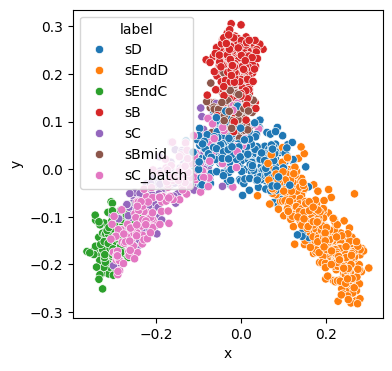

In [11]:
xvals = np.concat((adatas_cor[0].obsm["X_scanorama"][:, 0] ,adatas_cor[1].obsm["X_scanorama"][:, 0]))
yvals = np.concat((adatas_cor[0].obsm["X_scanorama"][:, 1] ,adatas_cor[1].obsm["X_scanorama"][:, 1]))
cats = np.concat((adatas_cor[0].obs["milestones"].values ,adatas_cor[1].obs["milestones"].values))

# create a DataFrame for the legend
legend_df = pd.DataFrame({
    "x": xvals,
    "y": yvals,
    "label": cats,
})

with plt.rc_context({"figure.figsize": (4, 4)}):
    sns.scatterplot(
        data=legend_df,
        x="x",
        y="y",
        hue="label",
        legend=True,
    )

    plt.show()

In [12]:
adata_scanorama.obsm

AxisArrays with keys: X_pca, X_umap, dimred, X_scanorama

/home/louise/Work/dynchro_paper/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_76566/1439455573.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_scanorama, resolution=1.75, key_added="leiden")


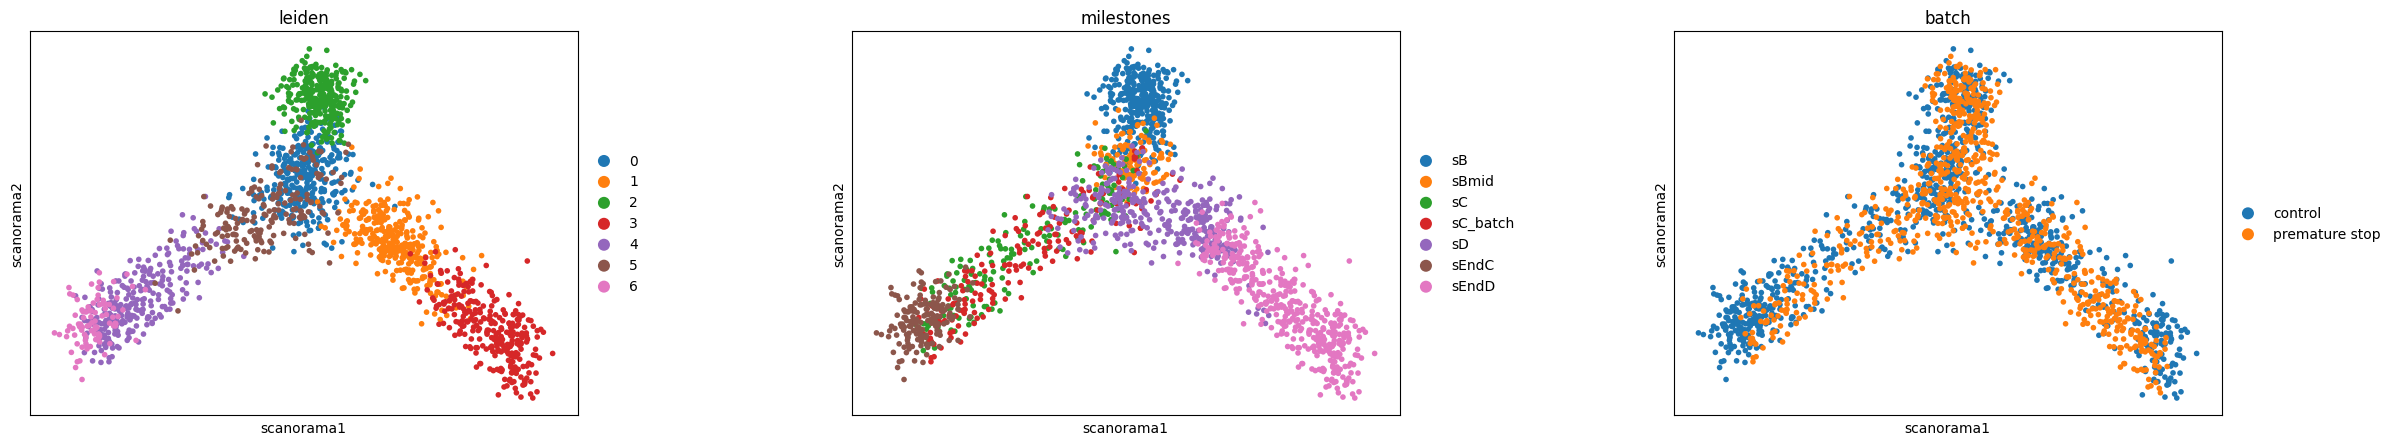

In [13]:
sc.pp.neighbors(adata_scanorama, use_rep="X_scanorama")
sc.tl.leiden(adata_scanorama, resolution=1.75, key_added="leiden")
sc.pl.scatter(adata_scanorama, basis="scanorama", color=['leiden', 'milestones', 'batch'])

In [14]:
adata_scanorama.uns["slingshot_start"] = ["2"]
adata_scanorama.uns["slingshot_end"] = ["3", "6"]

In [15]:
adata_scanorama.write_h5ad("data/scanorama.h5ad")

Run slingshot in R

## Pseudotime

In [16]:
adata_scanorama_result = ad.read_h5ad("data/scanorama_slingshot.h5ad")

In [17]:
adata_scanorama_result

AnnData object with n_obs × n_vars = 1822 × 531
    obs: 'step_ix', 'simulation_i', 'sim_time', 'milestones', 'leiden', 'orig_linD_pseudotime', 'orig_linC_pseudotime', 'linD', 'linC', 'batch', 'slingPseudotime_1', 'slingPseudotime_2'
    uns: 'batch_colors', 'leiden', 'leiden_colors', 'milestones_colors', 'neighbors', 'pca', 'slingshot_end', 'slingshot_start', 'traj_milestone_network', 'umap'
    obsm: 'X_pca', 'X_scanorama', 'X_umap', 'dimred'
    layers: 'X'
    obsp: 'connectivities', 'distances'

/home/louise/Work/dynchro_paper/.venv/lib/python3.13/site-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


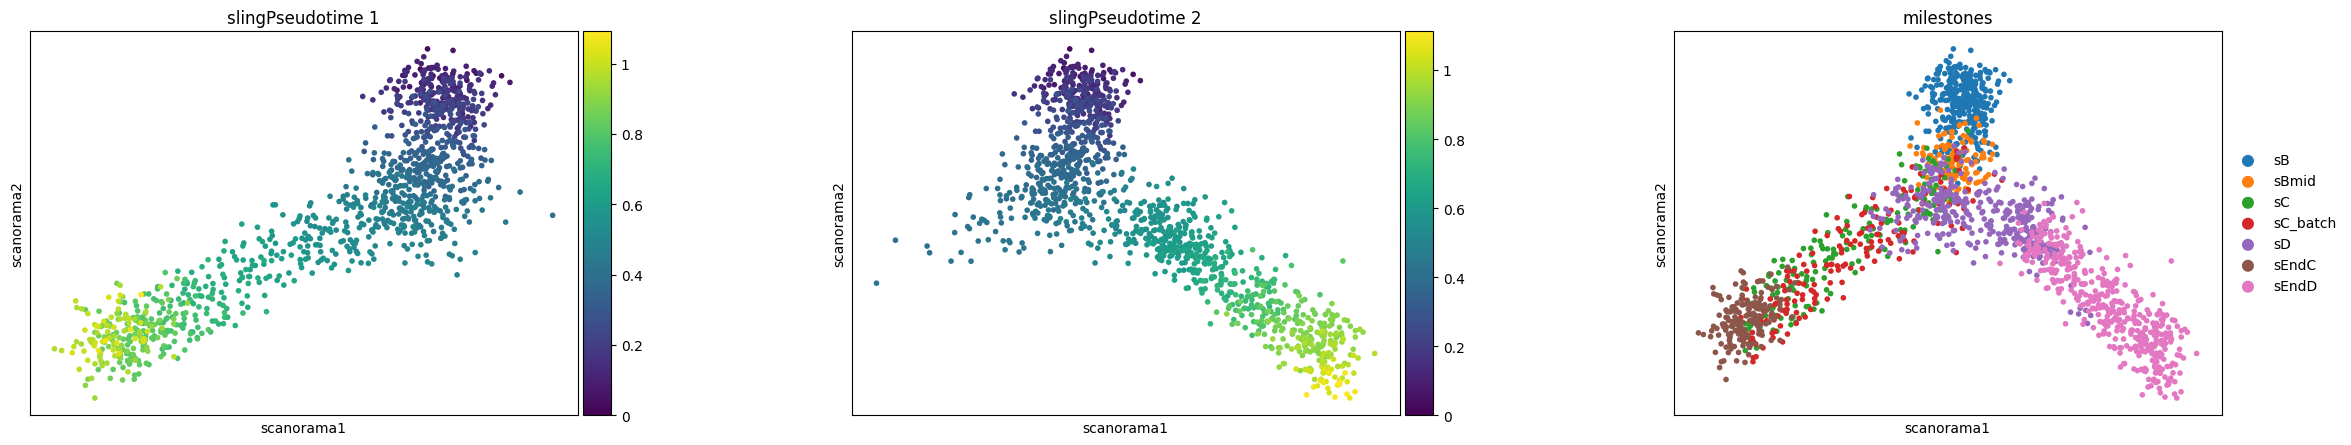

In [18]:
sc.pl.scatter(adata_scanorama_result, basis="scanorama", color=['slingPseudotime_1', 'slingPseudotime_2', "milestones"])

In [19]:
# select all cells that are not NA in slingPseudotime_1
clin = adata_scanorama_result[~adata_scanorama_result.obs.slingPseudotime_1.isna()]
dlin = adata_scanorama_result[~adata_scanorama_result.obs.slingPseudotime_2.isna()]

# KDE plots

In [20]:
%matplotlib inline

View of AnnData object with n_obs × n_vars = 179 × 531
    obs: 'step_ix', 'simulation_i', 'sim_time', 'milestones', 'leiden', 'orig_linD_pseudotime', 'orig_linC_pseudotime', 'linD', 'linC', 'batch', 'slingPseudotime_1', 'slingPseudotime_2'
    uns: 'batch_colors', 'leiden', 'leiden_colors', 'milestones_colors', 'neighbors', 'pca', 'slingshot_end', 'slingshot_start', 'traj_milestone_network', 'umap'
    obsm: 'X_pca', 'X_scanorama', 'X_umap', 'dimred'
    layers: 'X'
    obsp: 'connectivities', 'distances'
View of AnnData object with n_obs × n_vars = 180 × 531
    obs: 'step_ix', 'simulation_i', 'sim_time', 'milestones', 'leiden', 'orig_linD_pseudotime', 'orig_linC_pseudotime', 'linD', 'linC', 'batch', 'slingPseudotime_1', 'slingPseudotime_2'
    uns: 'batch_colors', 'leiden', 'leiden_colors', 'milestones_colors', 'neighbors', 'pca', 'slingshot_end', 'slingshot_start', 'traj_milestone_network', 'umap'
    obsm: 'X_pca', 'X_scanorama', 'X_umap', 'dimred'
    layers: 'X'
    obsp: 'conne

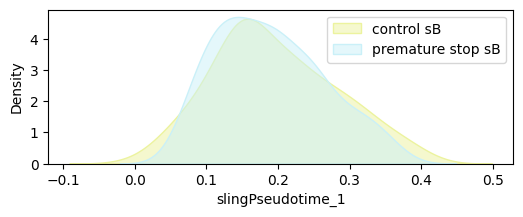

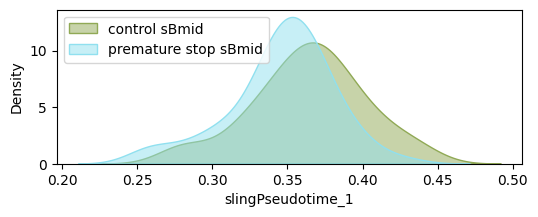

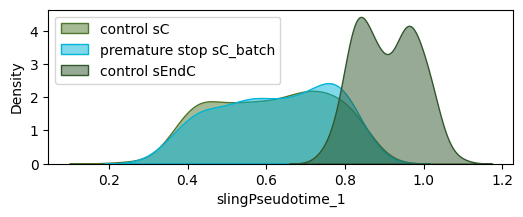

In [21]:
with plt.rc_context(rc={"figure.figsize": (6, 2)}):
    comp_kde(clin, "sB", time_column = "slingPseudotime_1", colors = ["#ecf39e", "#caf0f8"])
    comp_kde(clin, "sBmid",time_column = "slingPseudotime_1", colors = ["#90a955", "#90e0ef"])
    
    kdeplot2(clin, "control", "sC",time = "slingPseudotime_1", milestone_column = "milestones", color="#4f772d")
    kdeplot2(clin, "premature stop", "sC_batch",time = "slingPseudotime_1", milestone_column = "milestones", color="#00b4d8")
    kdeplot2(clin, "control", "sEndC", time = "slingPseudotime_1",milestone_column = "milestones", color="#31572c")
    plt.legend()

View of AnnData object with n_obs × n_vars = 179 × 531
    obs: 'step_ix', 'simulation_i', 'sim_time', 'milestones', 'leiden', 'orig_linD_pseudotime', 'orig_linC_pseudotime', 'linD', 'linC', 'batch', 'slingPseudotime_1', 'slingPseudotime_2'
    uns: 'batch_colors', 'leiden', 'leiden_colors', 'milestones_colors', 'neighbors', 'pca', 'slingshot_end', 'slingshot_start', 'traj_milestone_network', 'umap'
    obsm: 'X_pca', 'X_scanorama', 'X_umap', 'dimred'
    layers: 'X'
    obsp: 'connectivities', 'distances'
View of AnnData object with n_obs × n_vars = 180 × 531
    obs: 'step_ix', 'simulation_i', 'sim_time', 'milestones', 'leiden', 'orig_linD_pseudotime', 'orig_linC_pseudotime', 'linD', 'linC', 'batch', 'slingPseudotime_1', 'slingPseudotime_2'
    uns: 'batch_colors', 'leiden', 'leiden_colors', 'milestones_colors', 'neighbors', 'pca', 'slingshot_end', 'slingshot_start', 'traj_milestone_network', 'umap'
    obsm: 'X_pca', 'X_scanorama', 'X_umap', 'dimred'
    layers: 'X'
    obsp: 'conne

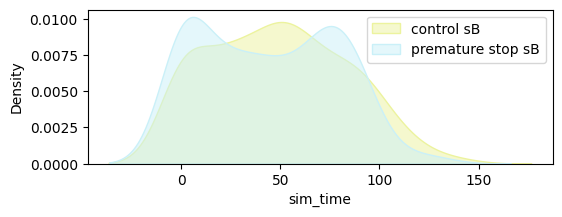

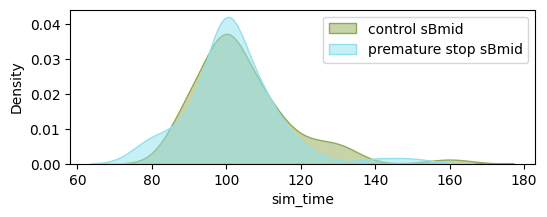

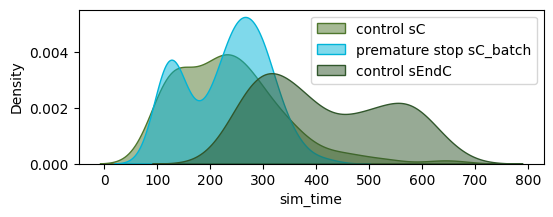

In [22]:
with plt.rc_context(rc={"figure.figsize": (6, 2)}):
    comp_kde(clin, "sB", colors = ["#ecf39e", "#caf0f8"], time_column="sim_time")
    comp_kde(clin, "sBmid", colors = ["#90a955", "#90e0ef"], time_column="sim_time")
    
    kdeplot2(clin, "control", "sC", milestone_column = "milestones", color="#4f772d", time="sim_time")
    kdeplot2(clin, "premature stop", "sC_batch", milestone_column = "milestones", color="#00b4d8", time="sim_time")
    kdeplot2(clin, "control", "sEndC", milestone_column = "milestones", color="#31572c",  time="sim_time")
    plt.legend()

# Metrics

## between original datasets & after scanorama

In [23]:
clin_after = clin
dlin_after = dlin

# select all where linC is True
clin_before = adata_scanorama_result[adata_scanorama_result.obs.linC == "TRUE"]
dlin_before = adata_scanorama_result[adata_scanorama_result.obs.linD == "TRUE"]

In [24]:
clin_before

View of AnnData object with n_obs × n_vars = 1186 × 531
    obs: 'step_ix', 'simulation_i', 'sim_time', 'milestones', 'leiden', 'orig_linD_pseudotime', 'orig_linC_pseudotime', 'linD', 'linC', 'batch', 'slingPseudotime_1', 'slingPseudotime_2'
    uns: 'batch_colors', 'leiden', 'leiden_colors', 'milestones_colors', 'neighbors', 'pca', 'slingshot_end', 'slingshot_start', 'traj_milestone_network', 'umap'
    obsm: 'X_pca', 'X_scanorama', 'X_umap', 'dimred'
    layers: 'X'
    obsp: 'connectivities', 'distances'

In [25]:
cbx, cby, cbkde = get_kde_eval(norm(clin_before.obs.orig_linC_pseudotime), bandwith=0.1)
dbx, dby, dbkde = get_kde_eval(norm(dlin_before.obs.orig_linD_pseudotime), bandwith=0.1)

cax, cay, cakde = get_kde_eval(norm(clin_after.obs.slingPseudotime_1), bandwith=0.1)
dax, day, dakde = get_kde_eval(norm(dlin_after.obs.slingPseudotime_2), bandwith=0.1)

In [28]:
startC = min(clin_before[clin_before.obs["milestones"] == "sC"].obs["orig_linC_pseudotime"])
startEndC = min(clin_before[clin_before.obs["milestones"] == "sEndC"].obs["orig_linC_pseudotime"])
linmin = min(clin_before.obs["orig_linC_pseudotime"])
linmax = max(clin_before.obs["orig_linC_pseudotime"])

startC_normalized = (startC - linmin) / (linmax - linmin)
startEndC_normalized = (startEndC - linmin) / (linmax - linmin)

startC_normalized, startEndC_normalized

(0.18798988170404404, 0.5908188837727303)

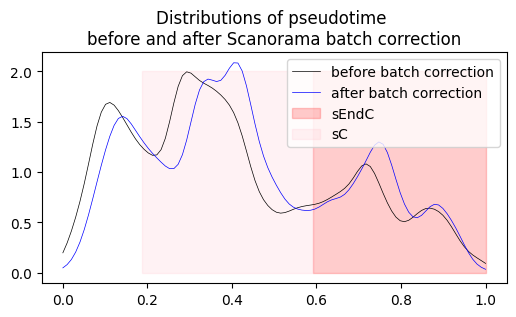

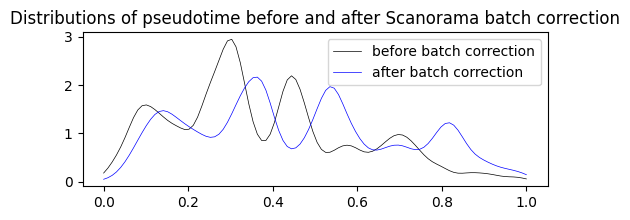

In [29]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
ax.plot(cbx, cby, color="black", lw=0.5, label="before batch correction")
ax.plot(cax, cay, color="blue", lw=0.5, label="after batch correction")
ax.fill_between([startEndC_normalized, 1], 0, 2, color="red", alpha=0.2, label="sEndC")
ax.fill_between([startC_normalized, startEndC_normalized], 0, 2, color="pink", alpha=0.2, label="sC")
plt.title("Distributions of pseudotime \nbefore and after Scanorama batch correction")
plt.legend()
plt.show()
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
ax.plot(dbx, dby, color="black", lw=0.5, label="before batch correction")
ax.plot(dax, day, color="blue", lw=0.5, label="after batch correction")
plt.title("Distributions of pseudotime before and after Scanorama batch correction")
plt.legend()
plt.show()

In [27]:
c_wasserstein = scipy.stats.wasserstein_distance(cbx, cax, cby, cay)
print(f"Wasserstein distance before vs after C: {c_wasserstein}")
d_wasserstein = scipy.stats.wasserstein_distance(dbx, dax, dby, day)
print(f"Wasserstein distance before vs after D: {d_wasserstein}")

Wasserstein distance before vs after C: 0.03577189574932058
Wasserstein distance before vs after D: 0.08318595488326824
